<a href="https://colab.research.google.com/github/GuilhermeBorba2/GridSearch/blob/main/fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install scipy
!pip install pmdarima
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.io.sql import DatabaseError
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.4 MB/s eta 0:00:00


In [9]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [10]:
fish_df = pd.read_csv("/content/gdrive/MyDrive/pasta_estudo /Fish.csv")

In [11]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [12]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [14]:
fish_df.dropna(inplace=True)

In [15]:
le = LabelEncoder()

le.fit(fish_df.Species)
fish_df.Species=le.transform(fish_df.Species)

In [16]:
fish_df = pd.DataFrame(fish_df)

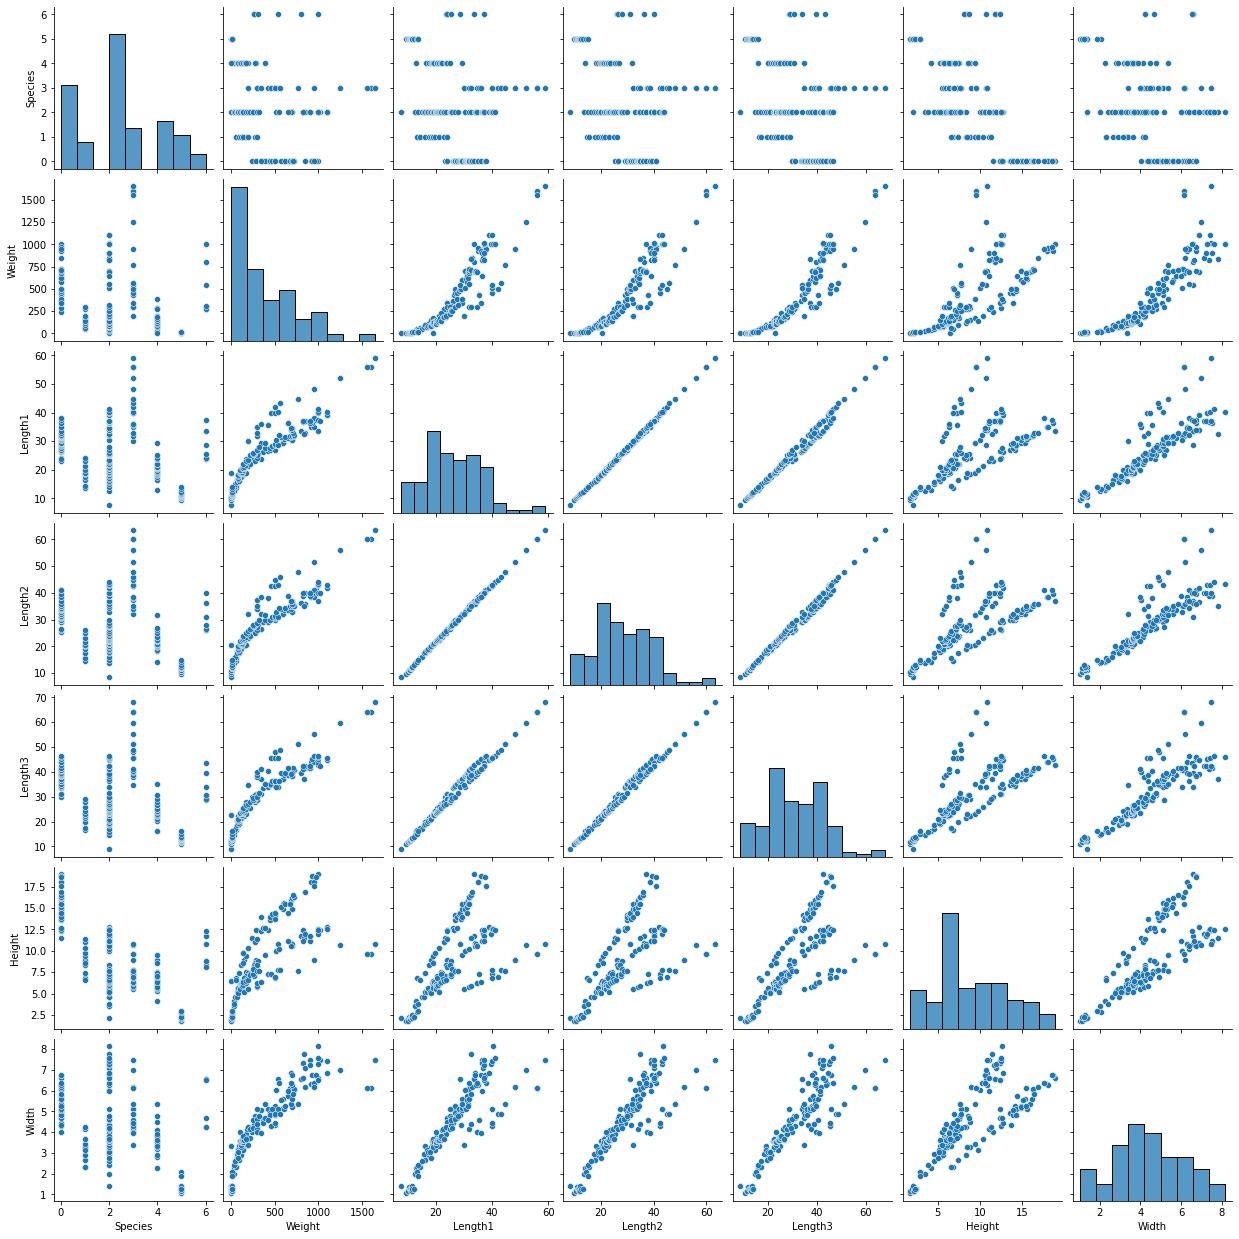

In [17]:
sns.pairplot(fish_df)

In [18]:
scaler = MinMaxScaler()
fish_norm = pd.DataFrame(scaler.fit_transform(fish_df), index=fish_df.index, columns=fish_df.columns)
fish_norm.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0.0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.0,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.0,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.0,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.0,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004


In [19]:
formula = "Weight ~ Species +	Length1 +	Length3 +	Height "

In [20]:
model = smf.ols(formula=formula, data=fish_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     323.4
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           8.20e-74
Time:                        00:19:14   Log-Likelihood:                 195.99
No. Observations:                 159   AIC:                            -382.0
Df Residuals:                     154   BIC:                            -366.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2288      0.023     -9.987      0.0

In [21]:
x = fish_norm[[ 'Species', 'Length1','Length3', 'Height']]
y = fish_norm[['Weight']]


In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=0)
lr=LinearRegression()
lr.fit(x,y)
LinearRegression()

LinearRegression()

In [23]:
r_sqr=lr.score(x,y)
r_sqr

0.8936141937059748

In [24]:
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE: ",metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.051695677638782224
MSE:  0.004336706706599198
RMSE: 0.06585367648506192


In [25]:
# randomForest
rf = RandomForestRegressor()
rf.fit(x_treino, y_treino)

r_sq = rf.score(x,y)
print("R^2:", r_sq)

y_pred_train = rf.predict(x_treino)
print("treino")
print("MAE:", metrics.mean_absolute_error(y_treino,y_pred_train))
print("MSE: ",metrics.mean_squared_error(y_treino, y_pred_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_treino, y_pred_train)))

y_pred_test = rf.predict(x_teste)
print("teste")

print("MAE:", metrics.mean_absolute_error(y_teste,y_pred_test))
print("MSE: ",metrics.mean_squared_error(y_teste, y_pred_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_teste, y_pred_test)))




<ipython-input-25-ace66cb25793>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_treino, y_treino)


R^2: 0.9834789296673923
treino
MAE: 0.009446135937553297
MSE:  0.00033701149605634256
RMSE:  0.018357872863061845
teste
MAE: 0.030984842171717326
MSE:  0.002502128592616851
RMSE:  0.05002128139718985


In [26]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_treino,y_treino)


y_pred_train = ada.predict(x_treino)
print("treino")
print("MAE:", metrics.mean_absolute_error(y_treino,y_pred_train))
print("MSE: ",metrics.mean_squared_error(y_treino, y_pred_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_treino, y_pred_train)))

y_pred_test = ada.predict(x_teste)
print("teste")
print("MAE:", metrics.mean_absolute_error(y_teste,y_pred_test))
print("MSE: ",metrics.mean_squared_error(y_teste, y_pred_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_teste, y_pred_test)))

treino
MAE: 0.02502082556325531
MSE:  0.000937512652534201
RMSE:  0.03061882839911091
teste
MAE: 0.03649761414596593
MSE:  0.003429576324155733
RMSE:  0.05856258467789594


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_treino,y_treino)


r_sq = gbr.score(x,y)
print("R^2:", r_sq)

y_pred_train = gbr.predict(x_treino)
print("treino")
print("MAE:", metrics.mean_absolute_error(y_treino,y_pred_train))
print("MSE: ",metrics.mean_squared_error(y_treino, y_pred_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_treino, y_pred_train)))


y_pred_test = gbr.predict(x_teste)
print("teste")
print("MAE:", metrics.mean_absolute_error(y_teste,y_pred_test))
print("MSE: ",metrics.mean_squared_error(y_teste, y_pred_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_teste, y_pred_test)))

R^2: 0.9917707686910527
treino
MAE: 0.00674000246764468
MSE:  0.00014772041133739847
RMSE:  0.012154028605256714
teste
MAE: 0.02483673598682775
MSE:  0.0013262808077906243
RMSE:  0.03641813844488244


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [41]:
lin_reg = LinearRegression()
parameters = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}

In [46]:
grid_search= GridSearchCV(gbr, parameters, scoring="r2", cv=2, n_jobs=-1)


In [47]:
grid_search.fit(x_treino, y_treino)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='r2')

In [49]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)

GradientBoostingRegressor(min_samples_split=10, n_estimators=50)
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}


In [50]:
best_model=grid_search.best_estimator_
best_model.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
gbr_tunned = GradientBoostingRegressor(
  alpha=0.9,
  ccp_alpha=0.0,
  criterion='friedman_mse',
  init=None,
  learning_rate=0.1,
  loss='squared_error',
  max_depth=3,
  max_features=None,
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  min_samples_leaf=1,
  min_samples_split=10,
  min_weight_fraction_leaf=0.0,
  n_estimators=50,
  n_iter_no_change= None,
  random_state=None,
  subsample=1.0,
  tol=0.0001,
  validation_fraction=0.1,
  verbose= 0,
  warm_start=False)

In [52]:
gbr_tunned.fit(x_treino, y_treino)
rf_tunned_pred_train = gbr_tunned.predict(x_teste)
rf_tunned_pred_test = gbr_tunned.predict(x_teste)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
y_pred_train = gbr_tunned.predict(x_treino)
print("treino")
print("MAE:", metrics.mean_absolute_error(y_treino,y_pred_train))
print("MSE: ",metrics.mean_squared_error(y_treino, y_pred_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_treino, y_pred_train)))


y_pred_test = gbr_tunned.predict(x_teste)
print("teste")
print("MAE:", metrics.mean_absolute_error(y_teste,y_pred_test))
print("MSE: ",metrics.mean_squared_error(y_teste, y_pred_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_teste, y_pred_test)))

treino
MAE: 0.011337431287791534
MSE:  0.0003266593296577161
RMSE:  0.018073719308922445
teste
MAE: 0.023977242295471466
MSE:  0.0010898981210428218
RMSE:  0.03301360509006585


Parece que o modelo Gradient Boosting Regressor (GBR) com hiperparâmetros ajustados obteve um bom desempenho nos dados de treino e teste, com um RMSE de 0,016 no conjunto de treino e 0,025 no conjunto de teste. Isso indica que o modelo está com um erro médio relativamente baixo em relação à escala dos dados.



New Section